# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [1]:
! git clone https://github.com/DS3001/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 42 (delta 6), reused 2 (delta 2), pack-reused 31
Receiving objects: 100% (42/42), 2.49 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.head()
df.dtypes


Price                     int64
Review Scores Rating    float64
Neighbourhood            object
Property Type            object
Room Type                object
dtype: object

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
df = df.loc[:,['Price', 'Review Scores Rating', 'Neighbourhood ']]
df.head()

,Price,Review Scores Rating,Neighbourhood
0,549,96.0,Manhattan
1,149,100.0,Brooklyn
2,250,100.0,Manhattan
3,90,94.0,Brooklyn
4,270,90.0,Manhattan


In [ ]:
df.groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                        Review Scores Rating                                   \
                    max                count       mean       std   min   25%   
Neighbourhood                                                                   
Bronx             244.0                217.0  91.654378  8.169239  60.0  88.0   
Brooklyn         4500.0               8487.0  92.363497  8.656563  20.0  90.0   
Manhattan       10000.0              11763.0  91.801496  8.840889  20.0  88.0   
Queens            950.0               1590.0  91.549057  9.895860  20.0  88.0   
Staten Island    5000.0                 96.0  90.843750  9.137923  40.0  87.0   

                                    
                 50%    75%    max  
Neighbourhood                       
Bronx           93.0   99.0  100.0  
Brooklyn        94.0  100.0  100.0  
Manhattan       93.0   99.0  100.0  
Queens          94.0  100.0  100.0  
Staten Island   92.0   97.0  100.0

Table shows that Manhattan has the highest price, and about middle ground mean review scores rating. Manhattan also has the highest mean prices for the highest and lowest quartiles as well.

<Axes: xlabel='Price', ylabel='Density'>

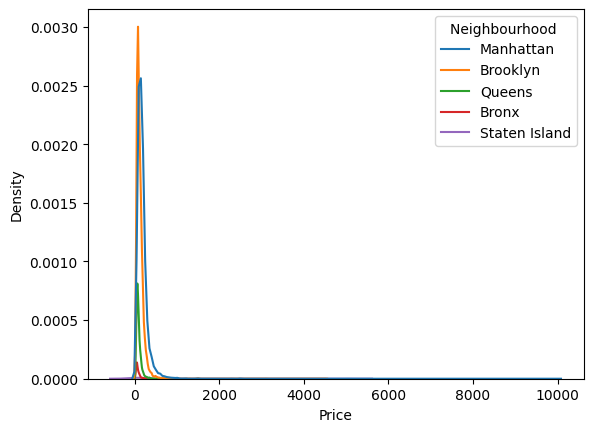

In [ ]:
#kernel density plot of price grouped by Neighborhood
sns.kdeplot(x = df['Price'], hue = df['Neighbourhood '])

<Axes: xlabel='Price', ylabel='Density'>

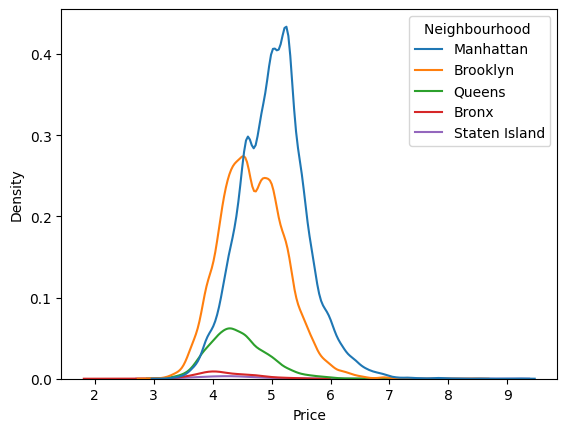

In [ ]:
logprice = np.log(df['Price'])
sns.kdeplot(x = logprice, hue = df['Neighbourhood '])

The kernel density plots also show Manhattan as the highest prices. Staten island and the Bronx are barely relevant when the log is taken.

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
from sklearn.linear_model import LinearRegression
#need to get dummy variables since neighborhoods are categorical
dums = pd.get_dummies(df['Neighbourhood '])


x = dums
y = df['Price']
#print(x)
#print(y)

model = linear_model.LinearRegression(fit_intercept=False).fit(x,y)
results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_}) # Regression coefficients
print('R-squared: ', model.score(x, y)) # R squared
#print(model.intercept_) if we had an intercept we'd have this code
results


R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


Shows manhattan as the most expensive. The coefficients from the regression are the same as the intial price mean.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
dums = pd.get_dummies(df['Neighbourhood '], drop_first = True)

# we need to drop first to get rid of the extra first column that is created during dummy creation. without it the correlation created during dummy creation would be higher
# is the equivalent to n-1

x = dums
y = df['Price']
#print(x)
#print(y)

model = linear_model.LinearRegression().fit(x,y)
results = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_}) # Regression coefficients
print('R-squared: ', model.score(x, y)) # R squared
print('Intercept: ', model.intercept_) #intercept
results

R-squared:  0.04631389606035197
Intercept:  75.27649769585331


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


When we drop the first column of the dummy variable we get rid of the Bronx. Thus, it's coefficient is now the new intercept for the graph.

In [ ]:
adjusted = pd.DataFrame({'variable':model.feature_names_in_, 'coefficient': model.coef_+model.intercept_})
print(adjusted)

        variable  coefficient
0       Brooklyn   127.747378
1      Manhattan   183.664286
2         Queens    96.857233
3  Staten Island   146.166667


Adding the new intercept back in gives us our old coefficients

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
from sklearn.model_selection import train_test_split # Split the sample 80 train/ 20 test
y = df['Price']
x = df.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)



In [ ]:
vars = ['Review Scores Rating' , 'Neighbourhood '] #variables to regress
regres = x.loc[:,vars] # data matrix
# need to train/test the data
y = df['Price']
x = regres
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)
regres.head()

#get dummys for categorical variables
newtrain = pd.get_dummies(x_train['Neighbourhood ']) #we don't drop first here since we don't need an intercept of the model
newtest =  pd.get_dummies(x_test['Neighbourhood '])

#need to concatenate the new train and test
contrain = pd.concat([x_train['Review Scores Rating'],newtrain], axis = 1)
contest = pd.concat([x_test['Review Scores Rating'], newtest], axis = 1)

reg = LinearRegression(fit_intercept = False).fit(contrain, y_train) # Fit the linear model

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
#print(reg.intercept_) # Intercept value (is false here)
#print(reg.coef_) # Regression coefficients -> same as results display

#rmse is the square root of the mean -> need to calculate yhat
yhat = reg.predict(contest)
print("RMSE: ", np.sqrt(np.mean((y_test-yhat)**2)))
print("R-squared: ", reg.score(contest, y_test)) # R squared measure
results

RMSE:  125.01092061382933
R-squared:  0.06701086106947296


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


Displays R-squared, RMSE, and coefficient above.

Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
cdf = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
cdf.head()
cdf.dtypes

Price                     int64
Review Scores Rating    float64
Neighbourhood            object
Property Type            object
Room Type                object
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split # Split the sample 80 train/ 20 test
y = cdf['Price']
x = cdf.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

In [ ]:
vars = ['Review Scores Rating' , 'Neighbourhood ', 'Property Type'] #variables to regress
regres = x.loc[:,vars] # data matrix
# need to train/test the data
y = df['Price']
x = regres
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)
regres.head()

,Review Scores Rating,Neighbourhood,Property Type
0,96.0,Manhattan,Apartment
1,100.0,Brooklyn,Apartment
2,100.0,Manhattan,Apartment
3,94.0,Brooklyn,Apartment
4,90.0,Manhattan,Apartment


In [ ]:
#need to figure out r2 + rmse

#get dummys for categorical variables
newtrainN = pd.get_dummies(x_train['Neighbourhood ']) #we don't drop first here since we don't need an intercept of the model
newtestN =  pd.get_dummies(x_test['Neighbourhood '])

newtrainP = pd.get_dummies(x_train['Property Type']) #we don't drop first here since we don't need an intercept of the model
newtestP =  pd.get_dummies(x_test['Property Type'])


#need to concatenate the new train and test
contrain = pd.concat([x_train['Review Scores Rating'],newtrainN, newtrainP], axis = 1)
contest = pd.concat([x_test['Review Scores Rating'], newtestN, newtestP], axis = 1)


reg = LinearRegression(fit_intercept = False).fit(contrain, y_train) # Fit the linear model

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
#print(reg.intercept_) # Intercept value (is false here)
#print(reg.coef_) # Regression coefficients -> same as results display
#print("R-squared: ", reg.score(contest, y_test)) # R squared measure
#yhat = reg.predict(contest)
#print("RMSE: ", np.sqrt(np.mean((y_test-yhat)**2)))
results
# need to bug r2 and rmse

,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-27.672764
2,Brooklyn,29.242598
3,Manhattan,91.749874
4,Queens,-0.373421
5,Staten Island,44.825719
6,Apartment,-2.497177
7,Bed & Breakfast,-33.828909
8,Boat,64.452800
9,Bungalow,51.260095


6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

If the coefficient decreases between part 4 to 5. This means that the slope is decreasing meaning that the dependent variable is becoming less predicted by the independent variable. When we control for the Property Type this decrease shows us that that explains some of the variation in prices (which is what we would expect).



7.**  Optional:** We've included Neighborhood and Property Type separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus Review Scores Rating. How does the slope coefficient for Review Scores Rating, the 𝑅2 , and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? What is the most expensive kind of property you can rent?

##come back to this when done

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [6]:
df = pd.read_csv('/content/linearRegression/data/cars_hw.csv')
og = df
df.head()
df.columns
df.dtypes

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

<Axes: >

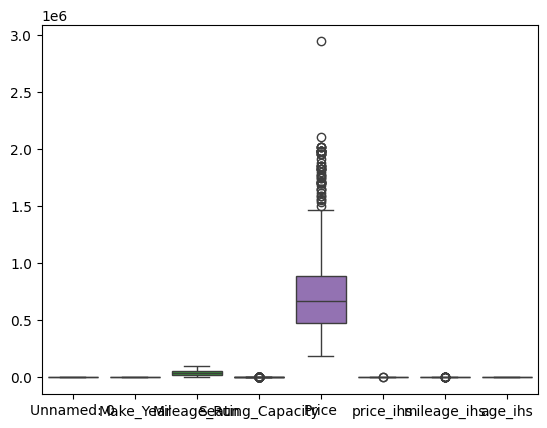

In [ ]:
#based off class notes we need to rescale some of the variables with arcsin and use boxplots to look at the data
sns.boxplot(data=df) # want to look at outliers -> shows us price has a lot

#rescaling
df['price_ihs'] = np.arcsinh(df['Price'])
df['mileage_ihs'] = np.arcsinh(df['Mileage_Run'])
df['age_ihs'] = np.arcsinh(df['Make_Year'])
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
sns.boxplot(data=df)


<Axes: >

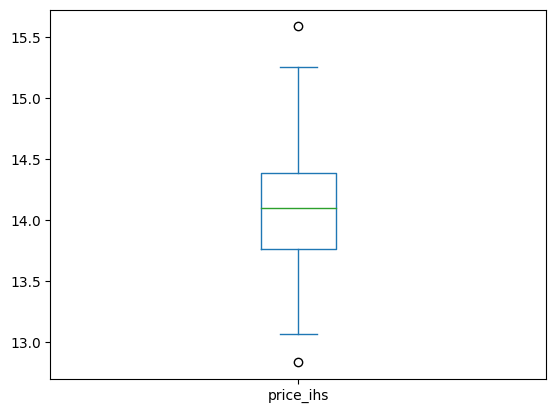

In [ ]:
df['price_ihs'].plot.box()

<Axes: >

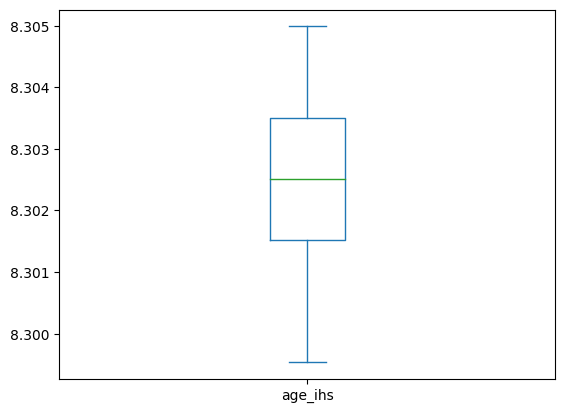

In [ ]:
df['age_ihs'].plot.box()

<Axes: >

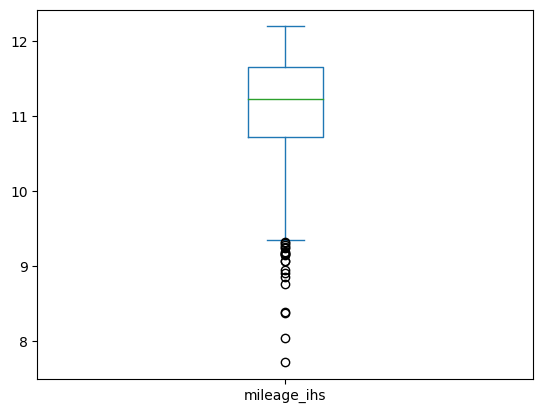

In [ ]:
df['mileage_ihs'].plot.box()

In [ ]:
#drop outliers
df = df.loc[df['price_ihs']>15.5,:]
df = df.loc[df['mileage_ihs']<9,:]



2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

3. Split the data into an 80% training set and a 20% testing set.

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


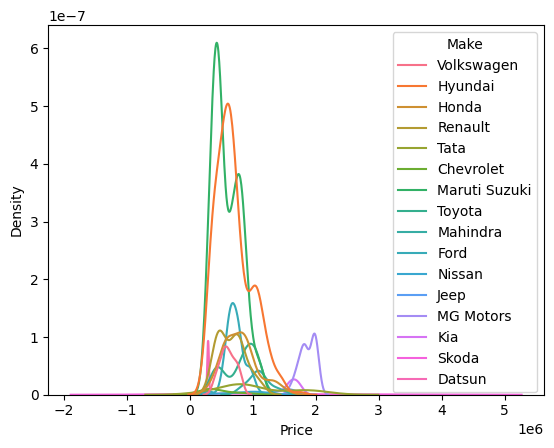

In [ ]:
#og['Price'].describe() without differentiation by make
sns.kdeplot(data = og, x ='Price', hue = 'Make')
og['Price'].groupby(og['Make']).describe()

In [12]:
#split into train and test set
from sklearn.model_selection import train_test_split # Split the sample 80 train/ 20 test
y = df['price_ihs']
x = df.drop(['price_ihs'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=100)

KeyError: 'price_ihs'

4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [8]:
og.dtypes
vars = ['age_ihs','mileage_ihs','Seating_Capcity']
#run regression on training data
reg = LinearRegression(fit_intercept = False).fit()
#run regression on test data

Unnamed: 0            int64
Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
Price                 int64
dtype: object

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?
7. Show that if you regress a variable $y$ on a one-hot encoded variable and no intercept, the regression coefficients are the group averages.

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?